# Question 2: Which homestay is the most recommended?
This project is using Seattle Airbnb dataset: https://www.kaggle.com/datasets/airbnb/seattle

Again, let's import some neccessary libraries

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
# Getting the types of homestay and their proportion from the Question 1
property_type_vals = df['property_type'].value_counts().reset_index()
property_type_vals.rename(columns={'index': 'Homestay type', 'property_type': 'count'}, inplace=True)
property_type_vals['perc'] = property_type_vals['count'] / np.sum(property_type_vals['count'])
property_type_vals

,Homestay type,count,perc
0,House,1733,0.454021
1,Apartment,1708,0.447472
2,Townhouse,118,0.030914
3,Condominium,91,0.023841
4,Loft,40,0.010479
5,Bed & Breakfast,37,0.009693
6,Other,22,0.005764
7,Cabin,21,0.005502
8,Camper/RV,13,0.003406
9,Bungalow,13,0.003406


In the previous question, there are two most common homestays: **House** and **Apartment**. The next question is: Which homestay is the most recommended?

In this case, we want to look at reviews dataset to see what people said

In [4]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [18]:
# Let's have a look at what the reviewer say
comments = reviews['comments'].value_counts().reset_index()
comments.rename(columns={'index': 'common comment', 'comments': 'count'}, inplace=True)
comments

,common comment,count
0,The host canceled this reservation the day bef...,57
1,The reservation was canceled the day before ar...,48
2,The host canceled this reservation 4 days befo...,22
3,The reservation was canceled 2 days before arr...,19
4,The host canceled this reservation 2 days befo...,17
...,...,...
84131,We love Anna's place! It's a fabulous value. ...,1
84132,The accommodations were fantastic. Robert was ...,1
84133,Emily's apartment is in a great location in ca...,1
84134,Bonnie and Dean's place was the highlight of m...,1


It just counted the numbers of same comments, so they are not my expected

After a quick look through data, it allows me to create a list of common words

In [11]:
# Here are the most 3 common words to evaluate whether a homestay is worth staying in
possible_vals = ['stay here again', 'comfortable', 'convenient']

In [14]:
# To see how often each of these individual values appears, I utilized this function from lesson
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [20]:
# Test the result
total_count(comments, 'common comment', 'count', possible_vals)

,common comment,count
1,comfortable,22936
2,convenient,7958
0,stay here again,5909


It actually worked, now we can apply this function to **House** and **Apartment** data to see which the most recommended is. From my point of view, I chosed the most reviews house and apartment to evaluate.

In [30]:
# Filter out the House and Apartment types.
houses = df[df['property_type'] == 'House']
apts = df[df['property_type'] == 'Apartment']

# Index with most reviewed
house_idx_most_reviewed = houses['number_of_reviews'].idxmax()
apt_idx_most_reviewed = apts['number_of_reviews'].idxmax()

# Choose the most reviewed homestays
house_most_reviewed = houses.loc[house_idx_most_reviewed]
apt_most_reviewed = apts.loc[apt_idx_most_reviewed]

print(f"The id of most reviewed house: {house_most_reviewed['id']}")
print(f"Number reviews of most reviewed house: {house_most_reviewed['number_of_reviews']}")
print(f"The id of most reviewed apartment: {apt_most_reviewed['id']}")
print(f"Number reviews of most reviewed apartment: {apt_most_reviewed['number_of_reviews']}")

The id of most reviewed house: 25002
Number reviews of most reviewed house: 404
The id of most reviewed apartment: 92835
Number reviews of most reviewed apartment: 319


In [31]:
# I also built a function to return a Series of comments given a Listing_id
def get_comments(listing_id: int, reviews: pd.DataFrame = reviews):
    '''
    INPUT - listing_id - int - the id of homestay you would like to know about
            reviews - pandas dataframe with the reviews of the survey
    OUTPUT - 
            comments - Series - series of comments
    '''
    reviews_id = reviews[reviews['listing_id'] == listing_id]
    comments = reviews_id['comments']
    
    return comments

In [33]:
# Test result
get_comments(25002)

29850    First, would I stay here again - YES.  The roo...
29851    Amanda's apartment is convenient and comfortab...
29852    Amanda and Luisa were great hostesses. The bed...
29853    The images of the room do not do it justice. I...
29854    Amanda's room was perfect for me.  It was clea...
                               ...                        
30249    Our stay at Amanda's was exactly what we wante...
30250    We had a lovely stay at Amanda's home. It was ...
30251    I just returned home from 4 days in Seattle.  ...
30252    This place was a true gem! Amanda made us feel...
30253    Amanda was a great host! Her apartment was cen...
Name: comments, Length: 404, dtype: object

After having the most reviewed **House** and **Apartment** ids, let's count three most common words for each

In [34]:
# Remind: Here are the most 3 common words to evaluate whether a homestay is worth staying in
possible_vals = ['stay here again', 'comfortable', 'convenient']

In [37]:
# Count the numbers of three most common words in comment for most reviewed house
house_comments = get_comments(house_most_reviewed['id'])
house_comments = house_comments.value_counts().reset_index()
house_comments.rename(columns={'index': 'common comment', 'comments': 'count'}, inplace=True)
house_comments_count = total_count(house_comments, 'common comment', 'count', possible_vals)
house_comments_count['rental type'] = 'most reviewed house'
house_comments_count

,common comment,count,rental type
1,comfortable,156,most reviewed house
0,stay here again,34,most reviewed house
2,convenient,27,most reviewed house


In [40]:
# Count the numbers of three most common words in comment for most reviewed apartment
apt_comments = get_comments(apt_most_reviewed['id'])
apt_comments = apt_comments.value_counts().reset_index()
apt_comments.rename(columns={'index': 'common comment', 'comments': 'count'}, inplace=True)
apt_comments_count = total_count(apt_comments, 'common comment', 'count', possible_vals)
apt_comments_count['rental type'] = 'most reviewed apartment'
apt_comments_count

,common comment,count,rental type
1,comfortable,74,most reviewed apartment
2,convenient,30,most reviewed apartment
0,stay here again,25,most reviewed apartment


Let's visualize them in a plot

In [42]:
df_plot = pd.concat([house_comments_count, apt_comments_count], ignore_index=True)
df_plot

,common comment,count,rental type
0,comfortable,156,most reviewed house
1,stay here again,34,most reviewed house
2,convenient,27,most reviewed house
3,comfortable,74,most reviewed apartment
4,convenient,30,most reviewed apartment
5,stay here again,25,most reviewed apartment


C:\Users\nguye\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


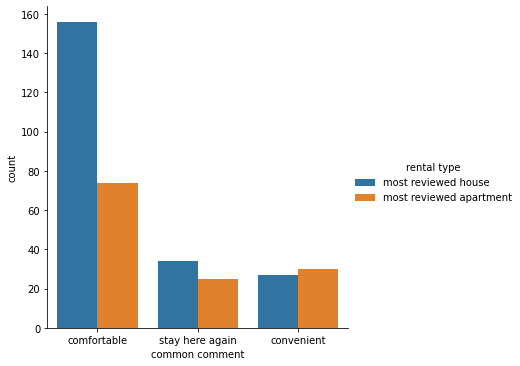

In [45]:
sns.factorplot(x='common comment', y='count', hue='rental type', kind='bar', data=df_plot)

The plot shows that living in a house is more comfortable than an apartment. Of course I think it's true to what the house brings